#NAME : M. Ali Nasir
#SIP ASSIGNMENT 1



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import scipy.io

path = '/content/drive/MyDrive/SIP/ass_1/'

%matplotlib inline

##Task 1: Use the load command to read the image from file imp01_1.mat

In [ ]:
import scipy.io

# Load the .mat file
mat_file_path = path+'imp01_1.mat.MAT'
mat_data = scipy.io.loadmat(mat_file_path)
image = mat_data['X']
print("Loaded image shape:", image.shape)

Loaded image shape: (258, 350)


##Task 2: Record the results of using the whos command and explain what each variable does

In [ ]:
# Inspect variables in the .mat file
print("Variables in mat file:", mat_data.keys())

print("\nImage variable properties:")
print("Name: img")
print("Shape:", image.shape)
print("Data type:", image.dtype)
print("Description: This is the image data loaded from imp01_1.mat, representing pixel values of a 2D array.")

Variables in mat file: dict_keys(['X', 'map', 'caption'])

Image variable properties:
Name: img
Shape: (258, 350)
Data type: uint8
Description: This is the image data loaded from imp01_1.mat, representing pixel values of a 2D array.


##Task 3: Verify that images are read as binary, indexed, intensity, or RGB images

In [ ]:
def check_image_type(img):
    if img.dtype == np.bool_ or (img.dtype == np.uint8 and np.all(np.logical_or(img == 0, img == 1))):
        return "Binary"
    elif len(img.shape) == 2 and img.dtype in [np.uint8, np.uint16, np.int16, np.float32, np.float64]:
        return "Intensity (Grayscale)"
    elif len(img.shape) == 3 and img.shape[2] == 3:
        return "RGB"
    else:
        return "Indexed (requires colormap for confirmation)"

# Check the type of the loaded image
image_type = check_image_type(image)
print(f"Image type: {image_type}")

Image type: Intensity (Grayscale)


##Task 4: Convert the images to the other three types

In [ ]:
# Convert to Binary (threshold at 0.5 for float, 128 for uint8)
binary_image = (image > 128).astype(np.uint8) if image.dtype == np.uint8 else (image > 0.5).astype(np.uint8)

# Convert to Intensity (grayscale)
if len(image.shape) == 3:  # If RGB, convert to grayscale
    intensity_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
else:
    intensity_image = image.astype(np.uint8)  # Already grayscale

# Convert to Indexed (with 256 colors)
indexed_image = cv2.applyColorMap(intensity_image, cv2.COLORMAP_JET) # Fixed: Assign the output to a single variable

# Convert to RGB
if len(image.shape) == 2:  # If grayscale, convert to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    rgb_image = image

cv2.imwrite('/content/drive/MyDrive/SIP/ass_1/Images/binary_image.png', binary_image * 255)
cv2.imwrite('/content/drive/MyDrive/SIP/ass_1/Images/intensity_image.png', intensity_image)
cv2.imwrite('/content/drive/MyDrive/SIP/ass_1/Images/indexed_image.png', indexed_image)
cv2.imwrite('/content/drive/MyDrive/SIP/ass_1/Images/rgb_image.png', rgb_image)

print("Images converted and saved.")

Images converted and saved.


##Task 5: Record the size and memory usage of each image array

In [ ]:
def get_memory_usage(img, name):
    shape = img.shape
    dtype = img.dtype
    memory = img.nbytes / 1024  # Size in KB
    print(f"{name}: Shape = {shape}, Data type = {dtype}, Memory = {memory:.2f} KB")

get_memory_usage(binary_image, "Binary Image")
get_memory_usage(intensity_image, "Intensity Image")
get_memory_usage(indexed_image, "Indexed Image")
get_memory_usage(rgb_image, "RGB Image")

Binary Image: Shape = (258, 350), Data type = uint8, Memory = 88.18 KB
Intensity Image: Shape = (258, 350), Data type = uint8, Memory = 88.18 KB
Indexed Image: Shape = (258, 350, 3), Data type = uint8, Memory = 264.55 KB
RGB Image: Shape = (258, 350, 3), Data type = uint8, Memory = 264.55 KB


##Task 6: Use imshow to display all four types of images

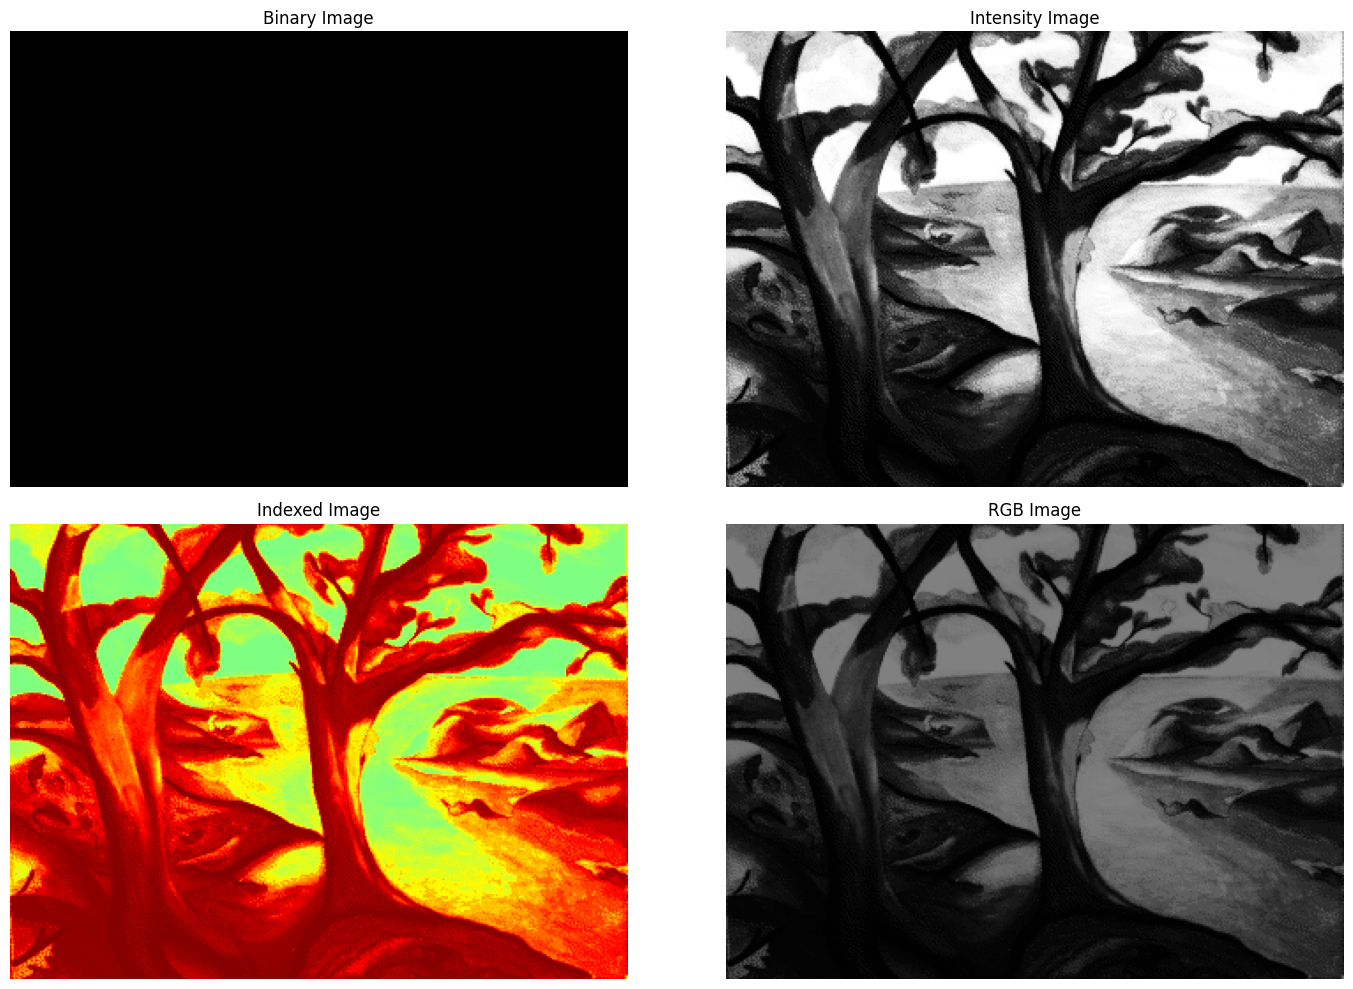

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(intensity_image, cmap='gray')
plt.title('Intensity Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(indexed_image)
plt.title('Indexed Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

plt.tight_layout()
plt.show()

##Task 7: Save the pixel value at coordinates (1,1) of the four images

In [ ]:
print("Pixel value at (0,0) for Binary Image:", binary_image[0, 0])
print("Pixel value at (0,0) for Intensity Image:", intensity_image[0, 0])
print("Pixel value at (0,0) for Indexed Image:", indexed_image[0, 0])
print("Pixel value at (0,0) for RGB Image:", rgb_image[0, 0])

Pixel value at (0,0) for Binary Image: 0
Pixel value at (0,0) for Intensity Image: 109
Pixel value at (0,0) for Indexed Image: [202 255  54]
Pixel value at (0,0) for RGB Image: [109 109 109]


##Task 8: Use imhist to display histograms of binary, indexed, and intensity images

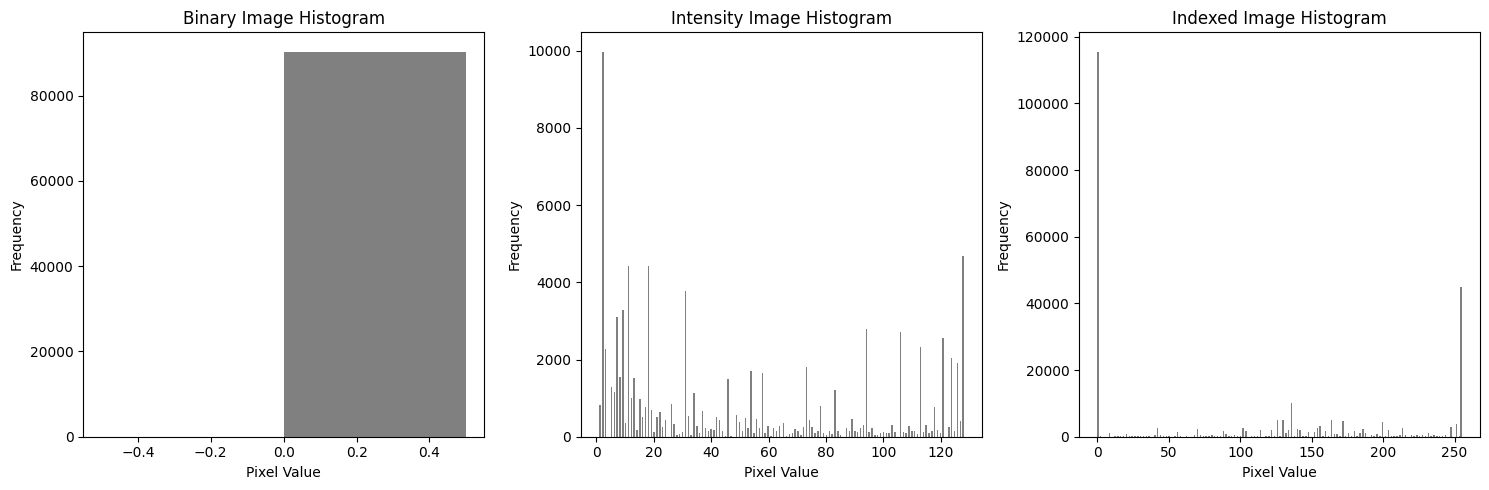

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(binary_image.ravel(), bins=2, color='gray')
plt.title('Binary Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(intensity_image.ravel(), bins=256, color='gray')
plt.title('Intensity Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(indexed_image.ravel(), bins=256, color='gray')
plt.title('Indexed Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Task 9: Use imread to read imp01_2.tif, imp01_3.tif, and imp01_4.tif into variables I1, I2, I3

In [ ]:
I1 = cv2.imread(path + 'imp01_2.tif')
I2 = cv2.imread(path + 'imp01_3.tif')
I3 = cv2.imread(path + 'imp01_4.tif')

# Convert BGR (OpenCV default) to RGB for display
I1 = cv2.cvtColor(I1, cv2.COLOR_BGR2RGB) if I1 is not None else None
I2 = cv2.cvtColor(I2, cv2.COLOR_BGR2RGB) if I2 is not None else None
I3 = cv2.cvtColor(I3, cv2.COLOR_BGR2RGB) if I3 is not None else None

print("I1 shape:", I1.shape if I1 is not None else "Not loaded")
print("I2 shape:", I2.shape if I2 is not None else "Not loaded")
print("I3 shape:", I3.shape if I3 is not None else "Not loaded")

I1 shape: (362, 500, 3)
I2 shape: (328, 438, 3)
I3 shape: (256, 256, 3)


##Task 10: Display all three images and record visual effects

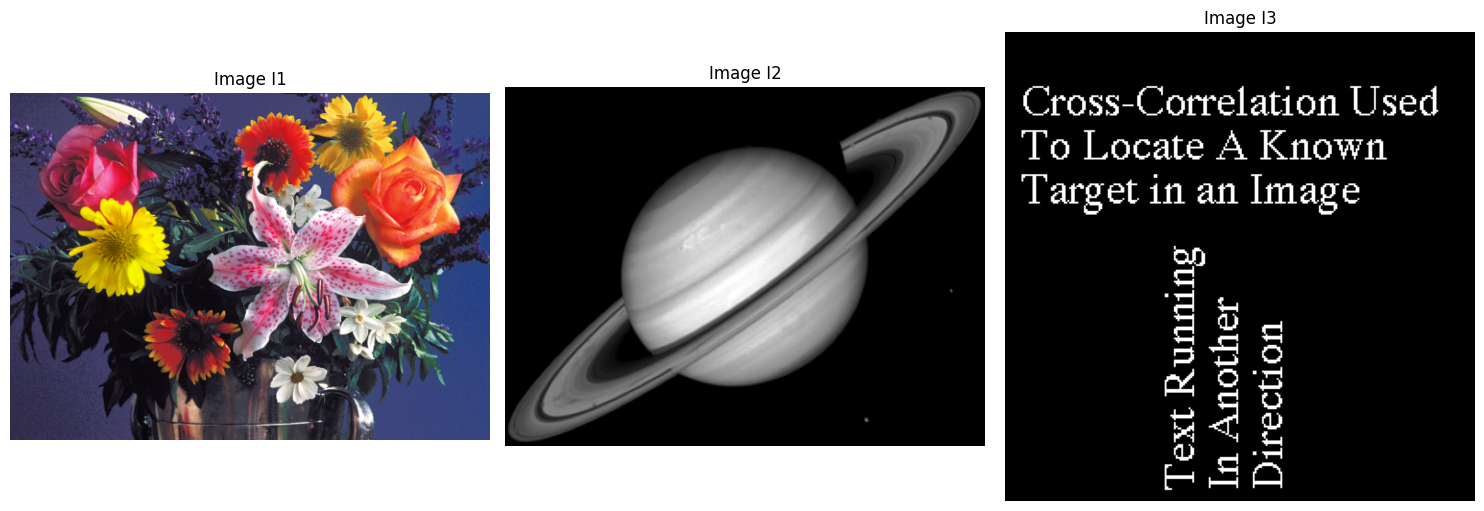

Visual effects:
I1: Likely an RGB or grayscale image with distinct color or intensity patterns.
I2: May show different textures or color distributions.
I3: Could have unique features like edges or specific objects.


In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(I1)
plt.title('Image I1')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(I2)
plt.title('Image I2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(I3)
plt.title('Image I3')
plt.axis('off')

plt.tight_layout()
plt.show()

# Record visual effects (example, update based on actual images)
print("Visual effects:")
print("I1: Likely an RGB or grayscale image with distinct color or intensity patterns.")
print("I2: May show different textures or color distributions.")
print("I3: Could have unique features like edges or specific objects.")

##Task 11: Convert I1 from RGB to indexed images with 256 and 16 colors

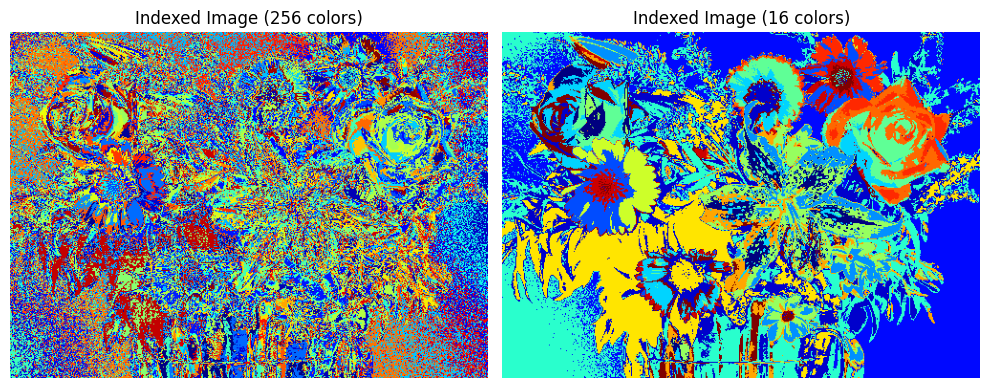

In [ ]:
from sklearn.cluster import KMeans

# Ensure I1 is RGB
if I1 is not None and len(I1.shape) == 3:
    # Reshape image to a 2D array of pixels
    pixels = I1.reshape(-1, 3)

    # Convert to indexed image with 256 colors
    kmeans_256 = KMeans(n_clusters=256, random_state=0).fit(pixels)
    I4 = kmeans_256.labels_.reshape(I1.shape[0], I1.shape[1])

    # Convert to indexed image with 16 colors
    kmeans_16 = KMeans(n_clusters=16, random_state=0).fit(pixels)
    I5 = kmeans_16.labels_.reshape(I1.shape[0], I1.shape[1])

    # Display results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(I4, cmap='jet')
    plt.title('Indexed Image (256 colors)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(I5, cmap='jet')
    plt.title('Indexed Image (16 colors)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("I1 is not an RGB image or not loaded.")

##Task 12: Set the colormap of I2 to JET

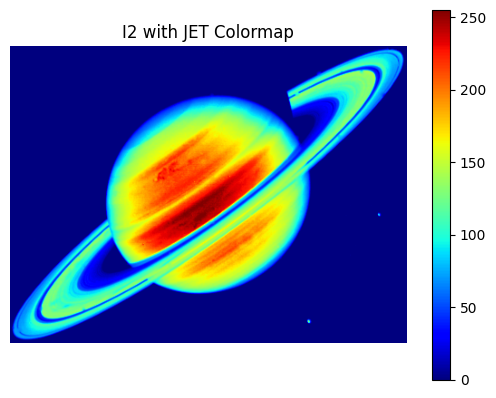

Observation: The JET colormap applies a range of colors from blue to red, highlighting intensity variations.


In [ ]:
if I2 is not None:
    if len(I2.shape) == 3:
        I2_gray = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)
    else:
        I2_gray = I2

    plt.figure()
    plt.imshow(I2_gray, cmap='jet')
    plt.title('I2 with JET Colormap')
    plt.axis('off')
    plt.colorbar()
    plt.show()

    print("Observation: The JET colormap applies a range of colors from blue to red, highlighting intensity variations.")
else:
    print("I2 is not loaded.")

##Task 13: Change colormap of I2 to Gray and display its negative

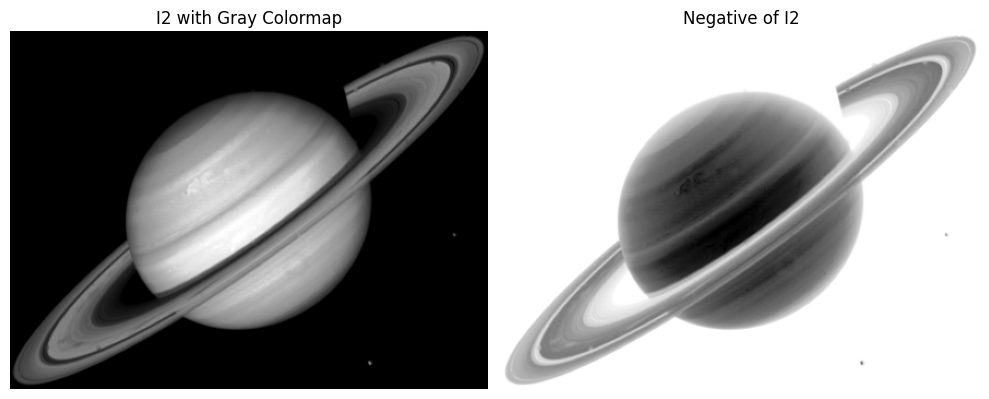

Observation: The negative image inverts intensities, making dark areas light and vice versa.


In [ ]:
if I2 is not None:
    if len(I2.shape) == 3:
        I2_gray = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)
    else:
        I2_gray = I2

    # Compute negative
    I2_negative = 255 - I2_gray

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(I2_gray, cmap='gray')
    plt.title('I2 with Gray Colormap')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(I2_negative, cmap='gray')
    plt.title('Negative of I2')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Observation: The negative image inverts intensities, making dark areas light and vice versa.")
else:
    print("I2 is not loaded.")

#Questions to Answer

##Question 1: Describe the nature of HSV Color Image

##HSV Color Image

The HSV (Hue, Saturation, Value) color model represents colors in a way that aligns with human perception of color. It is a cylindrical color space used in image processing to separate color information from intensity.





* Hue (H): Represents the type of color (e.g., red, blue), measured in degrees (0–360°). It determines the color's position on the color wheel (e.g., 0° for red, 120° for green, 240° for blue).



* Saturation (S): Indicates the intensity or purity of the color, ranging from 0 to 1 (or 0–100%). Low saturation (near 0) results in grayscale, while high saturation (near 1) is vivid.



* Value (V): Represents brightness or intensity, ranging from 0 to 1 (or 0–100%). 0 is black, and 1 is the brightest form of the color.

In image processing, HSV is useful because:





- Hue isolates color information, making it easier to manipulate specific colors.



- Saturation and Value allow adjustments to color intensity and brightness without affecting the hue.



- It’s intuitive for tasks like color-based segmentation.

In Python with OpenCV, an RGB image can be converted to HSV using cv2.cvtColor(img, cv2.COLOR_RGB2HSV). Each pixel is a triplet (H, S, V), typically stored as uint8 (H: 0–179, S: 0–255, V: 0–255 in OpenCV).




##Question 2: Write a function to convert indexed images to RGB images

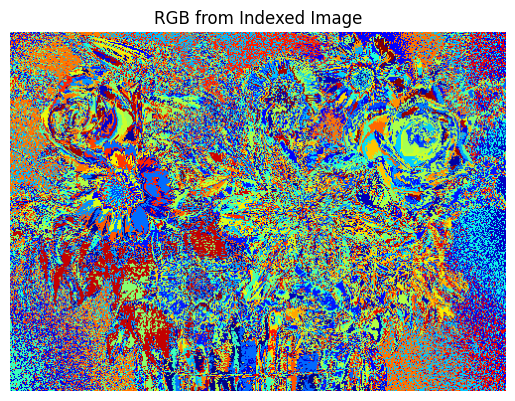

In [ ]:
def indexed_to_rgb(indexed_img, colormap):
    """
    Convert an indexed image to RGB using a given colormap.

    Parameters:
    - indexed_img: 2D NumPy array with index values
    - colormap: m-by-3 array with RGB values (0–255 or 0–1)

    Returns:
    - rgb_img: RGB image as a 3D NumPy array
    """
    # Ensure colormap is in range 0–255
    if colormap.max() <= 1:
        colormap = (colormap * 255).astype(np.uint8)

    # Initialize RGB image
    h, w = indexed_img.shape
    rgb_img = np.zeros((h, w, 3), dtype=np.uint8)

    # Map indices to RGB values
    for i in range(h):
        for j in range(w):
            index = int(indexed_img[i, j])
            if 0 <= index < len(colormap):
                rgb_img[i, j] = colormap[index]

    return rgb_img

# Example usage (assuming I4 from Task 11 and JET colormap)
colormap = plt.get_cmap('jet')(np.linspace(0, 1, 256))[:, :3]  # Get JET colormap
rgb_from_indexed = indexed_to_rgb(I4, colormap)
plt.imshow(rgb_from_indexed)
plt.title('RGB from Indexed Image')
plt.axis('off')
plt.show()

##Question 3: Describe image types and calculate memory size

##Image Types and Memory Calculation
###Binary Image

* Description: Each pixel is 1 bit, representing either 0 (black) or 1 (white). Stored as a logical array.
Memory Calculation: For an NxM image, memory = NxM bits = (NxM)/8 bytes. For N=M=512, memory = (512×512)/8 = 32,768 bytes = 32 KB.

###Intensity Image

* Description: Each pixel is 8 bits (1 byte), representing grayscale intensity (0–255 for uint8). Stored as a 2D array.
Memory Calculation: Memory = NxM bytes. For N=M=512, memory = 512×512 = 262,144 bytes = 256 KB.

###Indexed Image

* Description: Each pixel is an 8-bit index (0–255 for uint8) pointing to a colormap (256 colors, each an RGB triplet). The colormap is m×3 doubles (8 bytes each).
Memory Calculation: Image = NxM bytes. Colormap = 256×3×8 bytes = 6,144 bytes. For N=M=512, total memory = 512×512 + 6,144 = 262,144 + 6,144 = 268,288 bytes ≈ 262 KB.

###RGB Color Image

* Description: Each pixel has three 8-bit values (R, G, B), stored as an NxMx3 array.
Memory Calculation: Memory = NxM×3 bytes. For N=M=512, memory = 512×512×3 = 786,432 bytes = 768 KB.





# Question 4: Difference between image and imagesc in MATLAB

##Difference Between image and imagesc in MATLAB





###image:





* Displays an image using the pixel values directly as indices into a colormap (for indexed images) or as RGB values.



* Does not scale the data automatically; pixel values are mapped directly to the colormap or displayed as-is for RGB.



* Suitable for images where pixel values correspond directly to colormap indices or true colors.



* Example: image(X) for an indexed image X maps values to the current colormap.



###imagesc:





* Scales the image data to use the full range of the colormap, regardless of the data range.



* Normalizes pixel values to fit the colormap (e.g., min value maps to the first color, max to the last).



* Useful for visualizing matrices or intensity images where the data range varies.



* Example: imagesc(I) scales the intensity image I to use the entire colormap.

> Key Difference: image uses raw pixel values, while imagesc scales the data to optimize colormap usage, improving contrast for visualization.